# DATASET --> MINED FROM TWITTER
###### Collection of tweets based on the search term and date range

In [137]:
import os
import tweepy as tw
auth = tw.OAuthHandler('GNS0Bjy6U3HSHpEj2JR9bFdJk','5qr1aKLIyYjFovm064uzKVCEbMrbB3vLyrO15qtBFGjCbXVdsx')
auth.set_access_token('1390399586062282763-7yFrbKevZh3u8wIR0SQeAB8Q45b5J1','oM1erfRYFAPgiFHztzMzVrstpLh6aAW465pW0KsBC45gl')
api = tw.API(auth,wait_on_rate_limit=True)
search_words = "#nifty"
date_since = "2020-01-01"
import re
hashtags_list = list()
def f(string, pattern):
    pattern = r'(\w*%s\w*)' % pattern       
    return re.findall(pattern, string)
tweets_post = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(50000)
for tweet in tweets_post:
    t = f(tweet.text,"#")
    hashtags_list.append(t)

In [138]:
import itertools
hashtags_list.sort()
ds = list(hashtags_list for hashtags_list,_ in itertools.groupby(hashtags_list))
print(len(ds))

2014


In [139]:
ds

[[],
 ['#'],
 ['#', '#NIFTY'],
 ['#', '#Nifty', '#NIFTYFUTURE', '#NiftyBank', '#Trading'],
 ['#10', '#sketch', '#drawing', '#nft', '#nfts', '#NFTartists'],
 ['#100DaysOfCode',
  '#coding',
  '#code',
  '#Javascript',
  '#html',
  '#css',
  '#programming',
  '#fiverr',
  '#Loki'],
 ['#100DaysOfCode',
  '#coding',
  '#code',
  '#Javascript',
  '#html',
  '#css',
  '#programming',
  '#fiverr',
  '#Loki',
  '#amwriting',
  '#'],
 ['#100DaysOfCode',
  '#womanwhocode',
  '#Python',
  '#JAYB',
  '#COVID19Vic',
  '#vaccine',
  '#CodeNewbie',
  '#BTS',
  '#women',
  '#SEOKJIN',
  '#HanKer',
  '#Nifty'],
 ['#100DaysOfCode',
  '#womanwhocode',
  '#Python',
  '#JAYB',
  '#COVID19Vic',
  '#vaccine',
  '#CodeNewbie',
  '#BTS',
  '#women',
  '#SEOKJIN',
  '#HanKer',
  '#Nifty',
  '#kookv',
  '#UI'],
 ['#20stocksportfolio'],
 ['#3PGS'],
 ['#5g',
  '#vodafoneidea',
  '#port2vi',
  '#Airtel',
  '#Jio',
  '#IoT',
  '#telecom',
  '#PLIScheme',
  '#Ni'],
 ['#90WordEdit', '#BSE', '#Sensex', '#Nifty', '#mark

In [140]:
need = ["#nifty","#stocks"]
cleaned_hasgtags_list = []
for i in ds:
    if (set(need).issubset(i)):
        cleaned_hasgtags_list.append([e[1:] for e in list(filter(lambda x : len(x) >= 2 , i))])

In [141]:
cleaned_hasgtags_list

[['Globussspirit',
  'Positionalview',
  'RSI',
  'Bse',
  'Nse',
  'nifty',
  'banknifty',
  'fundmanagers',
  'stocks'],
 ['Indian', 'stocks', 'investing', 'trading', 'INTRADAY', 'nifty'],
 ['Indian',
  'stocks',
  'investing',
  'trading',
  'INTRADAY',
  'nifty',
  'StocksToWa'],
 ['Indian',
  'stocks',
  'investing',
  'trading',
  'INTRADAY',
  'nifty',
  'StocksToWatch'],
 ['LICHSGFIN', 'stocks', 'nifty'],
 ['Nifty',
  'sensex',
  'ITC',
  'trading',
  'investing',
  'binance',
  'nifty',
  'sensex',
  'itc',
  'stocks',
  'finance'],
 ['banknifty', 'nifty', 'stocks', 'traders'],
 ['escort', 'nifty', 'stocks'],
 ['escort', 'stocks', 'nifty'],
 ['infy', 'stocks', 'nifty'],
 ['invest',
  'stocks',
  'cypto',
  'bitcoin',
  'nifty',
  'sensex',
  'bse',
  'finance',
  'wallstreet'],
 ['monopoly',
  'trading',
  'stocks',
  'stockmarket',
  'nifty',
  'longterminvesting'],
 ['motilaloswal', 'Share', 'sensex', 'nifty', 'stocks'],
 ['nifty', 'midcap', 'smallcap', 'stocks', 'nse', 'GB'

# IMPLEMENTATION OF PHASE 1 - APRIORI ALGORITHM

In [142]:
from csv import reader
from collections import defaultdict
from itertools import chain, combinations
from csv import reader
from itertools import chain, combinations
from optparse import OptionParser

def dataToCSV(fname):
    first = True
    currentID = 1
    with open(fname, 'r') as dataFile, open(fname + '.csv', 'w') as outputCSV:
        for line in dataFile:
            nums = line.split()
            itemSetID = nums[1]
            item = nums[2]
            if(int(itemSetID) == currentID):
                if(first):
                    outputCSV.write(item)
                else:
                    outputCSV.write(',' + item)
                first = False
            else:
                outputCSV.write('\n' + item)
                currentID += 1


def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))


def getFromFile(fname):
    itemSets = []
    itemSet = set()

    with open(fname, 'r') as file:
        csv_reader = reader(file)
        for line in csv_reader:
            line = list(filter(None, line))
            record = set(line)
            for item in record:
                itemSet.add(frozenset([item]))
            itemSets.append(record)
    return itemSet, itemSets


def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet


def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # Remove set if subset is not available in previous K-frequent
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet


def associationRule(freqItemSet, itemSetWithSup, minConf):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(
                    itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), confidence])
    return rules


def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet



def apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    # Freq itemset(global) 
    globalFreqItemSet = dict()
    # Store itemset(global) with support
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(
        C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculation of frequent item set
    while(currentLSet):
        # Store the frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self join Lk
        candidateSet = getUnion(currentLSet, k)
        # Remove supersets that are pruned
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scan the itemSet (supp)
        currentLSet = getAboveMinSup(
            candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2])

    return globalFreqItemSet, rules



In [143]:
support = 0.08
ap_support_count = []
ap_time_list = []
support_list=[]
for i in range(20):
    support_list.append(support)
    start = time.time()
    ap_freqItemSet, ap_rules = apriori(cleaned_hasgtags_list, support, 0.5)
    ap_support_count.append(len(ap_freqItemSet))
    end = time.time()
    ap_time_list.append(end-start)
    support = support + 0.02
    

# IMPLEMENTATION OF PHASE 2 - FP GROWTH ALGORITHM

In [144]:
from csv import reader
from collections import defaultdict
from itertools import chain, combinations
from collections import defaultdict, OrderedDict
from csv import reader
from optparse import OptionParser
import time

class Node:
    def __init__(self, itemName, frequency, parentNode):
        self.itemName = itemName
        self.count = frequency
        self.parent = parentNode
        self.children = {}
        self.next = None

    def increment(self, frequency):
        self.count += frequency

    def display(self, ind=1):
        print('  ' * ind, self.itemName, ' ', self.count)
        for child in list(self.children.values()):
            child.display(ind+1)

def getFromFile(fname):
    itemSetList = []
    frequency = []
    
    with open(fname, 'r') as file:
        csv_reader = reader(file)
        for line in csv_reader:
            line = list(filter(None, line))
            itemSetList.append(line)
            frequency.append(1)

    return itemSetList, frequency
"""
"""
def constructTree(itemSetList, frequency, minSup):
    headerTable = defaultdict(int)
    # To Count the frequency 
    # Creation of header table
    for idx, itemSet in enumerate(itemSetList):
        for item in itemSet:
            headerTable[item] += frequency[idx]

    # Deletion of items which are below minSup
    headerTable = dict((item, sup) for item, sup in headerTable.items() if sup >= minSup)
    if(len(headerTable) == 0):
        return None, None

    # [Item: [frequency, headNode]] --> Header table
    for item in headerTable:
        headerTable[item] = [headerTable[item], None]

    fpTree = Node('Null', 1, None)
    # Updation of FP tree --> clean and sorted itemSet
    for idx, itemSet in enumerate(itemSetList):
        itemSet = [item for item in itemSet if item in headerTable]
        itemSet.sort(key=lambda item: headerTable[item][0], reverse=True)
        # Traverse to the leaf from the root
        # Updation of tree with given item
        currentNode = fpTree
        for item in itemSet:
            currentNode = updateTree(item, currentNode, headerTable, frequency[idx])

    return fpTree, headerTable

def updateHeaderTable(item, targetNode, headerTable):
    if(headerTable[item][1] == None):
        headerTable[item][1] = targetNode
    else:
        currentNode = headerTable[item][1]
        # Traversal to  last node and linking to target
        while currentNode.next != None:
            currentNode = currentNode.next
        currentNode.next = targetNode

def updateTree(item, treeNode, headerTable, frequency):
    if item in treeNode.children:
        # Increment of count
        treeNode.children[item].increment(frequency)
    else:
        # Creation of new branch
        newItemNode = Node(item, frequency, treeNode)
        treeNode.children[item] = newItemNode
        # Linking header table and new branch
        updateHeaderTable(item, newItemNode, headerTable)

    return treeNode.children[item]

def ascendFPtree(node, prefixPath):
    if node.parent != None:
        prefixPath.append(node.itemName)
        ascendFPtree(node.parent, prefixPath)

def findPrefixPath(basePat, headerTable):
    # Linked list --> First node
    treeNode = headerTable[basePat][1] 
    condPats = []
    frequency = []
    while treeNode != None:
        prefixPath = []
        # Leaf to Root
        ascendFPtree(treeNode, prefixPath)  
        if len(prefixPath) > 1:
            # Store prefix path and count
            condPats.append(prefixPath[1:])
            frequency.append(treeNode.count)

        # Move to next node
        treeNode = treeNode.next  
    return condPats, frequency

def mineTree(headerTable, minSup, preFix, freqItemList):
    # Sort and list out freq items
    sortedItemList = [item[0] for item in sorted(list(headerTable.items()), key=lambda p:p[1][0])] 
    # Begin with low frequency
    for item in sortedItemList:  
        # Concatenate freq patterns(conditional) and suffix patterns --> Pattern growth
        newFreqSet = preFix.copy()
        newFreqSet.add(item)
        freqItemList.append(newFreqSet)
        # Finding prefix path
        # Constrcution of conditional pattern base
        conditionalPattBase, frequency = findPrefixPath(item, headerTable) 
        # Construction of conditonal FP Tree that are with conditional pattern base
        conditionalTree, newHeaderTable = constructTree(conditionalPattBase, frequency, minSup) 
        if newHeaderTable != None:
            # Recursive mining in tree
            mineTree(newHeaderTable, minSup,
                       newFreqSet, freqItemList)

def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))

def getSupport(testSet, itemSetList):
    count = 0
    for itemSet in itemSetList:
        if(set(testSet).issubset(itemSet)):
            count += 1
    return count

def associationRule(freqItemSet, itemSetList, minConf):
    rules = []
    for itemSet in freqItemSet:
        subsets = powerset(itemSet)
        itemSetSup = getSupport(itemSet, itemSetList)
        for s in subsets:
            confidence = float(itemSetSup / getSupport(s, itemSetList))
            if(confidence > minConf):
                rules.append([set(s), set(itemSet.difference(s)), confidence])
    return rules

def getFrequencyFromList(itemSetList):
    frequency = [1 for i in range(len(itemSetList))]
    return frequency

def fpgrowth(itemSetList, minSupRatio, minConf):
    frequency = getFrequencyFromList(itemSetList)
    minSup = len(itemSetList) * minSupRatio
    fpTree, headerTable = constructTree(itemSetList, frequency, minSup)
    if(fpTree == None):
        print('No frequent item set')
    else:
        freqItems = []
        mineTree(headerTable, minSup, set(), freqItems)
        rules = associationRule(freqItems, itemSetList, minConf)
        return freqItems, rules


In [145]:
support_list=[]
support = 0.08
fp_support_count = []
fp_time_list = []
for i in range(20):
    support_list.append(support)
    start = time.time()
    fp_freqItemSet, fp_rules = fpgrowth(cleaned_hasgtags_list,support , 0.5)
    fp_support_count.append(len(fp_freqItemSet))
    end = time.time()
    fp_time_list.append(end-start)
    support = support + 0.02


In [146]:
fp_support_count

[1085, 1085, 47, 47, 37, 22, 22, 11, 11, 10, 10, 7, 7, 4, 4, 4, 4, 4, 4, 4]

In [147]:
ap_support_count

[10, 10, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2]

# VISUALIZATION OF PHASE 1  AND PHASE 2

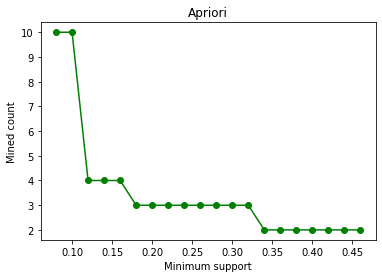

In [148]:
import matplotlib.pyplot as plt 

plt.plot(support_list,ap_support_count,marker="o",color="g")
plt.xlabel("Minimum support")
plt.ylabel("Mined count")
plt.title("Apriori")
plt.show()

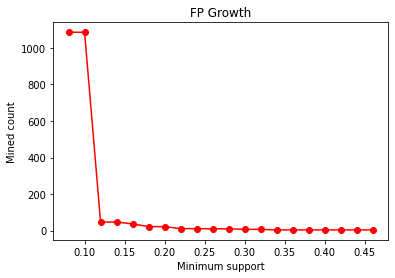

In [149]:
import matplotlib.pyplot as plt 

plt.plot(support_list,fp_support_count,marker="o",color="r")
plt.xlabel("Minimum support")
plt.ylabel("Mined count")
plt.title("FP Growth")
plt.show()

# COMPARISON OF PHASE1 AND PHASE2

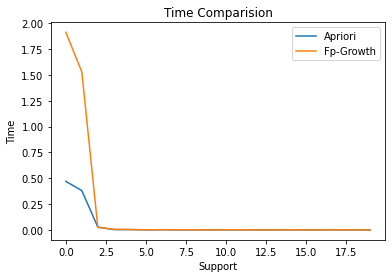

In [150]:
import matplotlib.pyplot as plt
plt.plot(ap_time_list,label="Apriori")
plt.plot(fp_time_list,label="Fp-Growth")
plt.title('Time Comparision')
plt.xlabel("Support")
plt.ylabel("Time")
plt.legend(loc="upper right")
plt.show()